In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Sanctions List - data exploration and descriptives**

*Data Cleaning Plan:*


1.   Load data
2.   get overview of the entire file (column names, size of the df, frequencies, dtypes)
3. get number of missingness for the Designation/ Entry into Force Dates
4. Transform Dtypes
5. Filter dataframe for missing Designation entries only to decide on relevance
6. get descriptives & plot data


*Further Steps*

7. Renaming & Filtering
8. Creation of new Variables
9. Grouping








In [2]:
print(os.getcwd())
path = ("C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\")
os.chdir(path)
print(os.getcwd())

C:\Users\cecilianatalie.strom\GitHub\INSA\EU
C:\Users\cecilianatalie.strom\GitHub\INSA


In [3]:
df=pd.read_csv('EU/eu_sanctions_historic_update.csv',sep=";",low_memory=False)
df

,fileGenerationDate,Entity_LogicalId,Entity_EU_ReferenceNumber,Entity_UnitedNationId,Entity_DesignationDate,Entity_DesignationDetails,Entity_Remark,Entity_SubjectType,Entity_SubjectType_ClassificationCode,Entity_Regulation_Type,...,Citizenship_LogicalId,Citizenship_RegulationLanguage,Citizenship_Remark,Citizenship_Regulation_Type,Citizenship_Regulation_OrganisationType,Citizenship_Regulation_PublicationDate,Citizenship_Regulation_EntryIntoForceDate,Citizenship_Regulation_NumberTitle,Citizenship_Regulation_Programme,Citizenship_Regulation_PublicationUrl
0,07/12/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07/12/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/12/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07/12/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,07/12/2023,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,1.0,EN,NaN,regulation,commission,2003-07-08,2003-07-07,1210/2003 (OJ L169),IRQ,http://eur-lex.europa.eu/LexUriServ/LexUriServ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30227,07/12/2023,159043,EU.10832.11,NaN,2023-12-07,NaN,(Date of UN designation: 2023-12-07),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30228,07/12/2023,159043,EU.10832.11,NaN,2023-12-07,NaN,(Date of UN designation: 2023-12-07),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30229,07/12/2023,159043,EU.10832.11,NaN,2023-12-07,NaN,(Date of UN designation: 2023-12-07),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30230,07/12/2023,159048,EU.10833.10,NaN,2023-12-07,NaN,(Date of UN designation: 2023-12-07),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape
#shows us the numer of rows & columns - 118 columns, we need to filter that!

(30232, 118)

In [5]:
#get all the missing values
is_na = df.isna().sum()
is_na

fileGenerationDate                               0
Entity_LogicalId                                 0
Entity_EU_ReferenceNumber                        0
Entity_UnitedNationId                        29426
Entity_DesignationDate                        5138
                                             ...  
Citizenship_Regulation_PublicationDate       28373
Citizenship_Regulation_EntryIntoForceDate    28373
Citizenship_Regulation_NumberTitle           28373
Citizenship_Regulation_Programme             28373
Citizenship_Regulation_PublicationUrl        28373
Length: 118, dtype: int64

In [6]:
#get the percentages of missingsness
values_list = list()
cols_list = list() #creating empty lists

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)

pct_missing_df =pd.DataFrame()
pct_missing_df["col"] = cols_list
pct_missing_df["pct_missing"] = values_list
pct_missing_df

,col,pct_missing
0,fileGenerationDate,0.000000
1,Entity_LogicalId,0.000000
2,Entity_EU_ReferenceNumber,0.000000
3,Entity_UnitedNationId,97.333951
4,Entity_DesignationDate,16.995237
...,...,...
113,Citizenship_Regulation_PublicationDate,93.850886
114,Citizenship_Regulation_EntryIntoForceDate,93.850886
115,Citizenship_Regulation_NumberTitle,93.850886
116,Citizenship_Regulation_Programme,93.850886


|index|col|pct\_missing|
|---|---|---|
|0|fileGenerationDate|0\.0|
|1|Entity\_LogicalId|0\.0|
|2|Entity\_EU\_ReferenceNumber|0\.0|
|3|Entity\_UnitedNationId|97\.33342155759942|
|4|Entity\_DesignationDate|16\.998610467809172|
|5|Entity\_DesignationDetails|97\.71058029511018|
|6|Entity\_Remark|11\.437173294514656|
|7|Entity\_SubjectType|0\.0|
|8|Entity\_SubjectType\_ClassificationCode|0\.0|
|9|Entity\_Regulation\_Type|0\.0|
|10|Entity\_Regulation\_OrganisationType|0\.0|
|11|Entity\_Regulation\_PublicationDate|0\.0|
|12|Entity\_Regulation\_EntryIntoForceDate|0\.0|
|13|Entity\_Regulation\_NumberTitle|0\.0|
|14|Entity\_Regulation\_Programme|0\.0|
|15|Entity\_Regulation\_PublicationUrl|0\.0|
|16|NameAlias\_LastName|80\.711969827301|
|17|NameAlias\_FirstName|80\.74505392708264|
|18|NameAlias\_MiddleName|86\.97809832594456|
|19|NameAlias\_WholeName|27\.013167471713096|
|20|NameAlias\_NameLanguage|54\.80050287831668|
|21|NameAlias\_Gender|70\.85952491232713|
|22|NameAlias\_Title|97\.85284192417124|
|23|NameAlias\_Function|88\.23860252762522|
|24|NameAlias\_LogicalId|27\.013167471713096|
|25|NameAlias\_RegulationLanguage|27\.013167471713096|
|26|NameAlias\_Remark|94\.98445047310263|
|27|NameAlias\_Regulation\_Type|27\.013167471713096|
|28|NameAlias\_Regulation\_OrganisationType|27\.013167471713096|
|29|NameAlias\_Regulation\_PublicationDate|27\.013167471713096|
|30|NameAlias\_Regulation\_EntryIntoForceDate|27\.013167471713096|
|31|NameAlias\_Regulation\_NumberTitle|27\.013167471713096|
|32|NameAlias\_Regulation\_Programme|27\.013167471713096|
|33|NameAlias\_Regulation\_PublicationUrl|27\.013167471713096|
|34|Address\_City|96\.20525375504533|
|35|Address\_Street|97\.07867398928074|
|36|Address\_PoBox|99\.77171971150665|
|37|Address\_ZipCode|99\.0306358763978|
|38|Address\_Region|99\.52358896314432|
|39|Address\_Place|99\.7948785813538|
|40|Address\_AsAtListingTime|95\.06716072255674|
|41|Address\_ContactInfo|98\.10097267253359|
|42|Address\_CountryIso2Code|95\.06716072255674|
|43|Address\_CountryDescription|95\.06716072255674|
|44|Address\_LogicalId|95\.06716072255674|
|45|Address\_RegulationLanguage|95\.06716072255674|
|46|Address\_Remark|98\.84205650764243|
|47|Address\_Regulation\_Type|95\.06716072255674|
|48|Address\_Regulation\_OrganisationType|95\.06716072255674|
|49|Address\_Regulation\_PublicationDate|95\.06716072255674|
|50|Address\_Regulation\_EntryIntoForceDate|95\.06716072255674|
|51|Address\_Regulation\_NumberTitle|95\.06716072255674|
|52|Address\_Regulation\_Programme|95\.06716072255674|
|53|Address\_Regulation\_PublicationUrl|95\.06716072255674|
|54|BirthDate\_BirthDate|91\.07060146893403|
|55|BirthDate\_Day|91\.07390987891219|
|56|BirthDate\_Month|91\.00112485939258|
|57|BirthDate\_Year|88\.66207900483028|
|58|BirthDate\_YearRangeFrom|99\.83127109111362|
|59|BirthDate\_YearRangeTo|99\.82796268113545|
|60|BirthDate\_Circa|88\.1658175081056|
|61|BirthDate\_CalendarType|88\.1658175081056|
|62|BirthDate\_ZipCode|100\.0|
|63|BirthDate\_Region|98\.91814993714021|
|64|BirthDate\_Place|98\.82882286772977|
|65|BirthDate\_City|94\.24005822801561|
|66|BirthDate\_CountryIso2Code|88\.1658175081056|
|67|BirthDate\_CountryDescription|88\.1658175081056|
|68|BirthDate\_LogicalId|88\.1658175081056|
|69|BirthDate\_RegulationLanguage|88\.1658175081056|
|70|BirthDate\_Remark|97\.9322437636472|
|71|BirthDate\_Regulation\_Type|88\.1658175081056|
|72|BirthDate\_Regulation\_OrganisationType|88\.1658175081056|
|73|BirthDate\_Regulation\_PublicationDate|88\.1658175081056|
|74|BirthDate\_Regulation\_EntryIntoForceDate|88\.1658175081056|
|75|BirthDate\_Regulation\_NumberTitle|88\.1658175081056|
|76|BirthDate\_Regulation\_Programme|88\.1658175081056|
|77|BirthDate\_Regulation\_PublicationUrl|88\.1658175081056|
|78|Identification\_Number|95\.90749685701053|
|79|Identification\_Diplomatic|95\.90749685701053|
|80|Identification\_KnownExpired|95\.90749685701053|
|81|Identification\_KnownFalse|95\.90749685701053|
|82|Identification\_ReportedLost|95\.90749685701053|
|83|Identification\_RevokedByIssuer|95\.90749685701053|
|84|Identification\_IssuedBy|99\.91398134056773|
|85|Identification\_IssuedDate|99\.26884139482564|
|86|Identification\_ValidFrom|99\.89082247072058|
|87|Identification\_ValidTo|99\.55998147290413|
|88|Identification\_LatinNumber|100\.0|
|89|Identification\_NameOnDocument|99\.97353272017469|
|90|Identification\_TypeCode|95\.90749685701053|
|91|Identification\_TypeDescription|95\.90749685701053|
|92|Identification\_Region|99\.85773837093893|
|93|Identification\_CountryIso2Code|95\.90749685701053|
|94|Identification\_CountryDescription|100\.0|
|95|Identification\_LogicalId|95\.90749685701053|
|96|Identification\_RegulationLanguage|95\.90749685701053|
|97|Identification\_Remark|97\.65764573545954|
|98|Identification\_Regulation\_Type|95\.90749685701053|
|99|Identification\_Regulation\_OrganisationType|95\.90749685701053|
|100|Identification\_Regulation\_PublicationDate|95\.90749685701053|
|101|Identification\_Regulation\_EntryIntoForceDate|95\.90749685701053|
|102|Identification\_Regulation\_NumberTitle|95\.90749685701053|
|103|Identification\_Regulation\_Programme|95\.90749685701053|
|104|Identification\_Regulation\_PublicationUrl|95\.90749685701053|
|105|Citizenship\_Region|100\.0|
|106|Citizenship\_CountryIso2Code|93\.8496658505922|
|107|Citizenship\_CountryDescription|100\.0|
|108|Citizenship\_LogicalId|93\.8496658505922|
|109|Citizenship\_RegulationLanguage|93\.8496658505922|
|110|Citizenship\_Remark|99\.91398134056773|
|111|Citizenship\_Regulation\_Type|93\.8496658505922|
|112|Citizenship\_Regulation\_OrganisationType|93\.8496658505922|
|113|Citizenship\_Regulation\_PublicationDate|93\.8496658505922|
|114|Citizenship\_Regulation\_EntryIntoForceDate|93\.8496658505922|
|115|Citizenship\_Regulation\_NumberTitle|93\.8496658505922|
|116|Citizenship\_Regulation\_Programme|93\.8496658505922|
|117|Citizenship\_Regulation\_PublicationUrl|93\.8496658505922|

In [7]:
#get a list of all columns
list1 = df.columns.to_list ()
list1

['fileGenerationDate',
 'Entity_LogicalId',
 'Entity_EU_ReferenceNumber',
 'Entity_UnitedNationId',
 'Entity_DesignationDate',
 'Entity_DesignationDetails',
 'Entity_Remark',
 'Entity_SubjectType',
 'Entity_SubjectType_ClassificationCode',
 'Entity_Regulation_Type',
 'Entity_Regulation_OrganisationType',
 'Entity_Regulation_PublicationDate',
 'Entity_Regulation_EntryIntoForceDate',
 'Entity_Regulation_NumberTitle',
 'Entity_Regulation_Programme',
 'Entity_Regulation_PublicationUrl',
 'NameAlias_LastName',
 'NameAlias_FirstName',
 'NameAlias_MiddleName',
 'NameAlias_WholeName',
 'NameAlias_NameLanguage',
 'NameAlias_Gender',
 'NameAlias_Title',
 'NameAlias_Function',
 'NameAlias_LogicalId',
 'NameAlias_RegulationLanguage',
 'NameAlias_Remark',
 'NameAlias_Regulation_Type',
 'NameAlias_Regulation_OrganisationType',
 'NameAlias_Regulation_PublicationDate',
 'NameAlias_Regulation_EntryIntoForceDate',
 'NameAlias_Regulation_NumberTitle',
 'NameAlias_Regulation_Programme',
 'NameAlias_Regula

In [8]:
#describe the individual columns
print(df["Entity_DesignationDate"].describe())
print(df["Entity_Regulation_PublicationDate"].describe())
print(df["Entity_Regulation_EntryIntoForceDate"].describe())

count          25094
unique           346
top       2022-02-23
freq            1513
Name: Entity_DesignationDate, dtype: object
count          30232
unique           304
top       2022-09-15
freq            2023
Name: Entity_Regulation_PublicationDate, dtype: object
count          30232
unique           309
top       2022-09-16
freq            2023
Name: Entity_Regulation_EntryIntoForceDate, dtype: object


In [9]:
#and get the numbers of missingness for specific variables
print(df["Entity_DesignationDate"].isnull().sum())
print(df["Entity_Regulation_PublicationDate"].isnull().sum())
print(df['Entity_Regulation_EntryIntoForceDate'].isnull().sum())

5138
0
0


we can see, that the Entity Designation Date column has 5138 missing values, lets investiagte them further

In [10]:
#first we have to check the data types and potentially transform them
df.dtypes

fileGenerationDate                           object
Entity_LogicalId                              int64
Entity_EU_ReferenceNumber                    object
Entity_UnitedNationId                        object
Entity_DesignationDate                       object
                                              ...  
Citizenship_Regulation_PublicationDate       object
Citizenship_Regulation_EntryIntoForceDate    object
Citizenship_Regulation_NumberTitle           object
Citizenship_Regulation_Programme             object
Citizenship_Regulation_PublicationUrl        object
Length: 118, dtype: object

In [11]:
#change NaN values to None
df = df.replace(np.nan,None)
#create an additional variable indicating if Entity_DesignationDate is missing or not
def test_func(df):
    """ Test Function for generating new value"""
    if df['Entity_DesignationDate'] == None :
              return 1
    else:
      return 0

df["missing_designation"] = df.apply(test_func, axis=1)
print(df)

      fileGenerationDate  Entity_LogicalId Entity_EU_ReferenceNumber  \
0             07/12/2023                13                  EU.27.28   
1             07/12/2023                13                  EU.27.28   
2             07/12/2023                13                  EU.27.28   
3             07/12/2023                13                  EU.27.28   
4             07/12/2023                13                  EU.27.28   
...                  ...               ...                       ...   
30227         07/12/2023            159043               EU.10832.11   
30228         07/12/2023            159043               EU.10832.11   
30229         07/12/2023            159043               EU.10832.11   
30230         07/12/2023            159048               EU.10833.10   
30231         07/12/2023            159048               EU.10833.10   

      Entity_UnitedNationId Entity_DesignationDate Entity_DesignationDetails  \
0                      None                   None     

In [12]:
df["missing_designation"].describe()

count    30232.000000
mean         0.169952
std          0.375597
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: missing_designation, dtype: float64

In [13]:
#now only show values with missing Designation date and inspect
df_missing = df.query("missing_designation == 1")
df_missing

,fileGenerationDate,Entity_LogicalId,Entity_EU_ReferenceNumber,Entity_UnitedNationId,Entity_DesignationDate,Entity_DesignationDetails,Entity_Remark,Entity_SubjectType,Entity_SubjectType_ClassificationCode,Entity_Regulation_Type,...,Citizenship_RegulationLanguage,Citizenship_Remark,Citizenship_Regulation_Type,Citizenship_Regulation_OrganisationType,Citizenship_Regulation_PublicationDate,Citizenship_Regulation_EntryIntoForceDate,Citizenship_Regulation_NumberTitle,Citizenship_Regulation_Programme,Citizenship_Regulation_PublicationUrl,missing_designation
0,07/12/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,1
1,07/12/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,1
2,07/12/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,1
3,07/12/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,None,None,None,None,None,None,None,None,None,1
4,07/12/2023,13,EU.27.28,None,None,None,(UNSC RESOLUTION 1483),P,person,regulation,...,EN,None,regulation,commission,2003-07-08,2003-07-07,1210/2003 (OJ L169),IRQ,http://eur-lex.europa.eu/LexUriServ/LexUriServ...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,07/12/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,1
30196,07/12/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,1
30197,07/12/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,1
30198,07/12/2023,157762,EU.10781.42,None,None,None,None,E,enterprise,amendment,...,None,None,None,None,None,None,None,None,None,1


In [14]:
#save df as separate csv files to inspect manually
df_missing.to_csv('EU/eu_missing_designation.csv')
df.to_csv('EU/eu_sanctions_complete.csv')

**Data Exploration & Visualization**

In [15]:
#get info on different Entity types
print(list(df.Entity_SubjectType_ClassificationCode.unique()))

#get info on different sanction regimes
print(list(df.Entity_Regulation_Programme.unique()))

#get information on the sanctioning institutions
print(list(df.Entity_Regulation_Type.unique()))

print(list(df.Entity_Regulation_OrganisationType.unique()))

['person', 'enterprise']
['IRQ', 'TERR', 'TAQA', 'AFG', 'COD', 'SDN', 'BLR', 'IRN', 'PRK', 'GIN', 'SOM', 'TUN', 'LBY', 'SYR', 'GNB', 'UKR', 'CAF', 'YEM', 'SSD', 'BDI', 'VEN', 'MMR', 'EUAQ', 'CHEM', 'ZWE', 'UNLI', 'MLI', 'NIC', 'CYB', 'TUR', 'HR', 'HTI', 'MDA']
['regulation', 'amendment', 'repealing']
['commission', 'council', 'opoce', 'un']


In [38]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [41]:
list_a=list[df['Entity_Regulation_EntryIntoForceDate'].value_counts()]
list_b=list[df['Entity_DesignationDate'].value_counts()]

In [43]:
print(list_a)
print(list_b)

list[Entity_Regulation_EntryIntoForceDate
2022-09-16    2023
2023-09-15    1796
2020-05-30    1626
2023-03-15    1177
2023-02-25     988
2017-03-10     941
2022-12-16     925
2023-06-23     923
2022-04-08     893
2023-07-22     789
2022-06-03     634
2021-06-21     572
2023-01-23     564
2023-08-03     516
2022-02-26     498
2012-01-17     449
2021-02-27     391
2012-03-23     360
2022-02-25     360
2017-09-01     347
2022-08-02     338
2023-04-24     326
2023-02-14     319
2017-03-09     313
2023-02-20     273
2022-07-21     271
2023-07-20     259
2022-09-13     257
2022-11-14     249
2022-10-06     231
2003-07-07     226
2022-03-12     216
2023-02-27     216
2020-03-14     210
2023-04-04     210
2023-04-15     200
2021-09-14     194
2022-12-07     191
2022-12-12     191
2022-06-01     182
2022-02-21     171
2017-03-08     162
2022-10-17     161
2021-12-02     159
2023-05-27     154
2023-07-28     144
2023-03-07     137
2021-03-16     129
2023-05-04     128
2017-06-25     126
2021-03-

In [35]:
#count the number of times I have a certain Designation Date or an EntryIntoForce Date
df_test = df.groupby("Entity_DesignationDate").count()
df_test

,fileGenerationDate,Entity_LogicalId,Entity_EU_ReferenceNumber,Entity_UnitedNationId,Entity_DesignationDetails,Entity_Remark,Entity_SubjectType,Entity_SubjectType_ClassificationCode,Entity_Regulation_Type,Entity_Regulation_OrganisationType,...,Citizenship_Regulation_NumberTitle,Citizenship_Regulation_Programme,Citizenship_Regulation_PublicationUrl,missing_designation,DesignationDate,DesignationMonth,DesignationYear,Regulation_EntryIntoForceDate,Regulation_EntryIntoForceMonth,Regulation_EntryIntoForceYear
Entity_DesignationDate,,,,,,,,,,,,,,,,,,,,,
2000-04-12,5,5,5,0,0,5,5,5,5,5,...,1,1,1,5,5,5,5,5,5,5
2001-01-25,282,282,282,0,0,282,282,282,282,282,...,52,52,52,282,282,282,282,282,282,282
2001-01-31,60,60,60,0,0,60,60,60,60,60,...,11,11,11,60,60,60,60,60,60,60
2001-02-23,221,221,221,0,0,221,221,221,221,221,...,42,42,42,221,221,221,221,221,221,221
2001-03-08,4,4,4,0,0,4,4,4,4,4,...,1,1,1,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-20,252,252,252,0,0,252,252,252,252,252,...,20,20,20,252,252,252,252,252,252,252
2023-07-28,144,144,144,0,0,144,144,144,144,144,...,11,11,11,144,144,144,144,144,144,144
2023-08-03,498,498,498,0,0,498,498,498,498,498,...,36,36,36,498,498,498,498,498,498,498


In [36]:
df_test.max()

fileGenerationDate                1513
Entity_LogicalId                  1513
Entity_EU_ReferenceNumber         1513
Entity_UnitedNationId              107
Entity_DesignationDetails           43
                                  ... 
DesignationMonth                  1513
DesignationYear                   1513
Regulation_EntryIntoForceDate     1513
Regulation_EntryIntoForceMonth    1513
Regulation_EntryIntoForceYear     1513
Length: 124, dtype: int64

In [17]:
#get ALL designation dates
list1 = list(df.Entity_DesignationDate.unique())
list2 = list(df.Entity_Regulation_EntryIntoForceDate.unique())
print(list1)
print(list2)

[None, '2002-06-18', '2002-05-03', '2001-12-28', '2002-10-30', '2001-10-06', '2001-01-25', '2001-10-17', '2001-02-23', '2001-01-31', '2002-01-11', '2001-12-24', '2001-03-08', '2003-06-25', '2003-09-09', '2003-11-03', '2003-11-11', '2003-11-12', '2004-05-11', '2006-07-06', '2004-06-28', '2005-05-16', '2005-11-01', '2005-12-06', '2006-04-21', '2006-04-25', '2004-09-24', '2006-08-02', '2006-12-12', '2007-03-29', '2007-03-24', '2006-12-23', '2008-03-03', '2007-04-23', '2007-07-03', '2007-09-13', '2008-01-16', '2009-03-03', '2008-06-04', '2008-06-23', '2021-07-31', '2008-07-03', '2008-12-10', '2009-07-16', '2009-04-24', '2009-06-29', '2021-08-05', '2010-01-19', '2010-03-25', '2009-12-22', '2010-04-12', '2010-03-11', '2010-04-22', '2010-05-11', '2010-06-09', '2010-07-26', '2010-07-20', '2010-11-04', '2010-12-01', '2012-05-02', '2016-11-30', '2016-03-02', '2010-12-22', '2011-02-09', '2011-02-26', '2011-02-28', '2011-03-17', '2011-03-21', '2011-03-24', '2011-04-12', '2011-05-09', '2011-06-23',

In [18]:
#now match them for doubles
matches = [element for element in list1 if element in list2]
print(matches)

['2021-07-31', '2011-06-16', '2011-07-28', '2011-12-01', '2012-03-23', '2011-06-24', '2014-08-21', '2021-08-07', '2017-05-30', '2017-09-16', '2018-03-06', '2018-03-19', '2018-06-07', '2018-07-16', '2018-10-15', '2019-01-21', '2019-05-01', '2019-05-14', '2020-01-28', '2020-05-04', '2020-07-30', '2020-09-21', '2020-10-01', '2020-10-22', '2020-10-15', '2020-11-06', '2020-10-16', '2021-01-15', '2021-04-12', '2021-02-22', '2021-03-02', '2021-03-22', '2021-04-15', '2021-04-19', '2021-06-21', '2021-08-02', '2021-10-11', '2021-11-15', '2021-12-02', '2021-12-13', '2022-01-10', '2022-02-21', '2022-02-23', '2022-02-25', '2022-02-28', '2022-03-02', '2022-03-09', '2022-03-15', '2022-04-08', '2022-04-21', '2022-05-30', '2022-06-03', '2022-06-20', '2022-07-21', '2022-09-01', '2022-10-06', '2022-10-17', '2022-10-20', '2022-11-14', '2022-11-08', '2022-12-08', '2022-12-16', '2022-12-12', '2023-01-23', '2023-01-30', '2023-02-20', '2023-02-25', '2023-03-07', '2023-03-20', '2023-04-13', '2023-04-24', '2023

In [19]:
len(matches)

82

In [20]:
#and differences
differences = [element for element in list1 if element not in list2] + [element for element in list2 if element not in list1]
print(differences)

[None, '2002-06-18', '2002-05-03', '2001-12-28', '2002-10-30', '2001-10-06', '2001-01-25', '2001-10-17', '2001-02-23', '2001-01-31', '2002-01-11', '2001-12-24', '2001-03-08', '2003-06-25', '2003-09-09', '2003-11-03', '2003-11-11', '2003-11-12', '2004-05-11', '2006-07-06', '2004-06-28', '2005-05-16', '2005-11-01', '2005-12-06', '2006-04-21', '2006-04-25', '2004-09-24', '2006-08-02', '2006-12-12', '2007-03-29', '2007-03-24', '2006-12-23', '2008-03-03', '2007-04-23', '2007-07-03', '2007-09-13', '2008-01-16', '2009-03-03', '2008-06-04', '2008-06-23', '2008-07-03', '2008-12-10', '2009-07-16', '2009-04-24', '2009-06-29', '2021-08-05', '2010-01-19', '2010-03-25', '2009-12-22', '2010-04-12', '2010-03-11', '2010-04-22', '2010-05-11', '2010-06-09', '2010-07-26', '2010-07-20', '2010-11-04', '2010-12-01', '2012-05-02', '2016-11-30', '2016-03-02', '2010-12-22', '2011-02-09', '2011-02-26', '2011-02-28', '2011-03-17', '2011-03-21', '2011-03-24', '2011-04-12', '2011-05-09', '2011-06-23', '2011-05-23',

In [21]:
len(differences)

492

as seen above, only few of the dates actually match between the Designation of an Entity and the actual Sanctioning

In [22]:
#extract year and month information
import datetime
from datetime import datetime as dt
df['DesignationDate'] = pd.to_datetime(df.Entity_DesignationDate, format='%Y-%m-%d')
df['DesignationMonth'] = df['DesignationDate'].dt.month
df['DesignationYear'] = df['DesignationDate'].dt.year

In [23]:
#same for the Sanctuiioning date extract year and month information
df['Regulation_EntryIntoForceDate'] = pd.to_datetime(df.Entity_Regulation_EntryIntoForceDate, format='%Y-%m-%d')
df['Regulation_EntryIntoForceMonth'] = df['Regulation_EntryIntoForceDate'].dt.month
df['Regulation_EntryIntoForceYear'] = df['Regulation_EntryIntoForceDate'].dt.year

In [24]:
df.DesignationYear.unique()

array([  nan, 2002., 2001., 2003., 2004., 2006., 2005., 2007., 2008.,
       2009., 2021., 2010., 2012., 2016., 2011., 2015., 2014., 2013.,
       2000., 2017., 2018., 2019., 2020., 2022., 2023.])

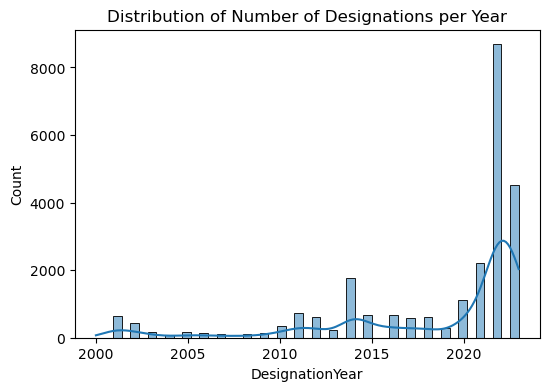

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df.DesignationYear, kde=True)
plt.title("Distribution of Number of Designations per Year")
plt.savefig('EU/DesignationYear.png')
plt.show()

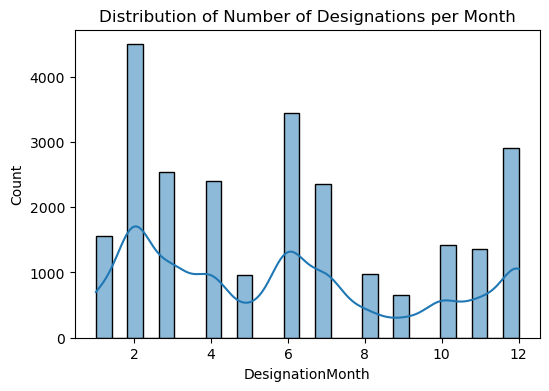

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df.DesignationMonth, kde=True)
plt.title("Distribution of Number of Designations per Month")
plt.show()

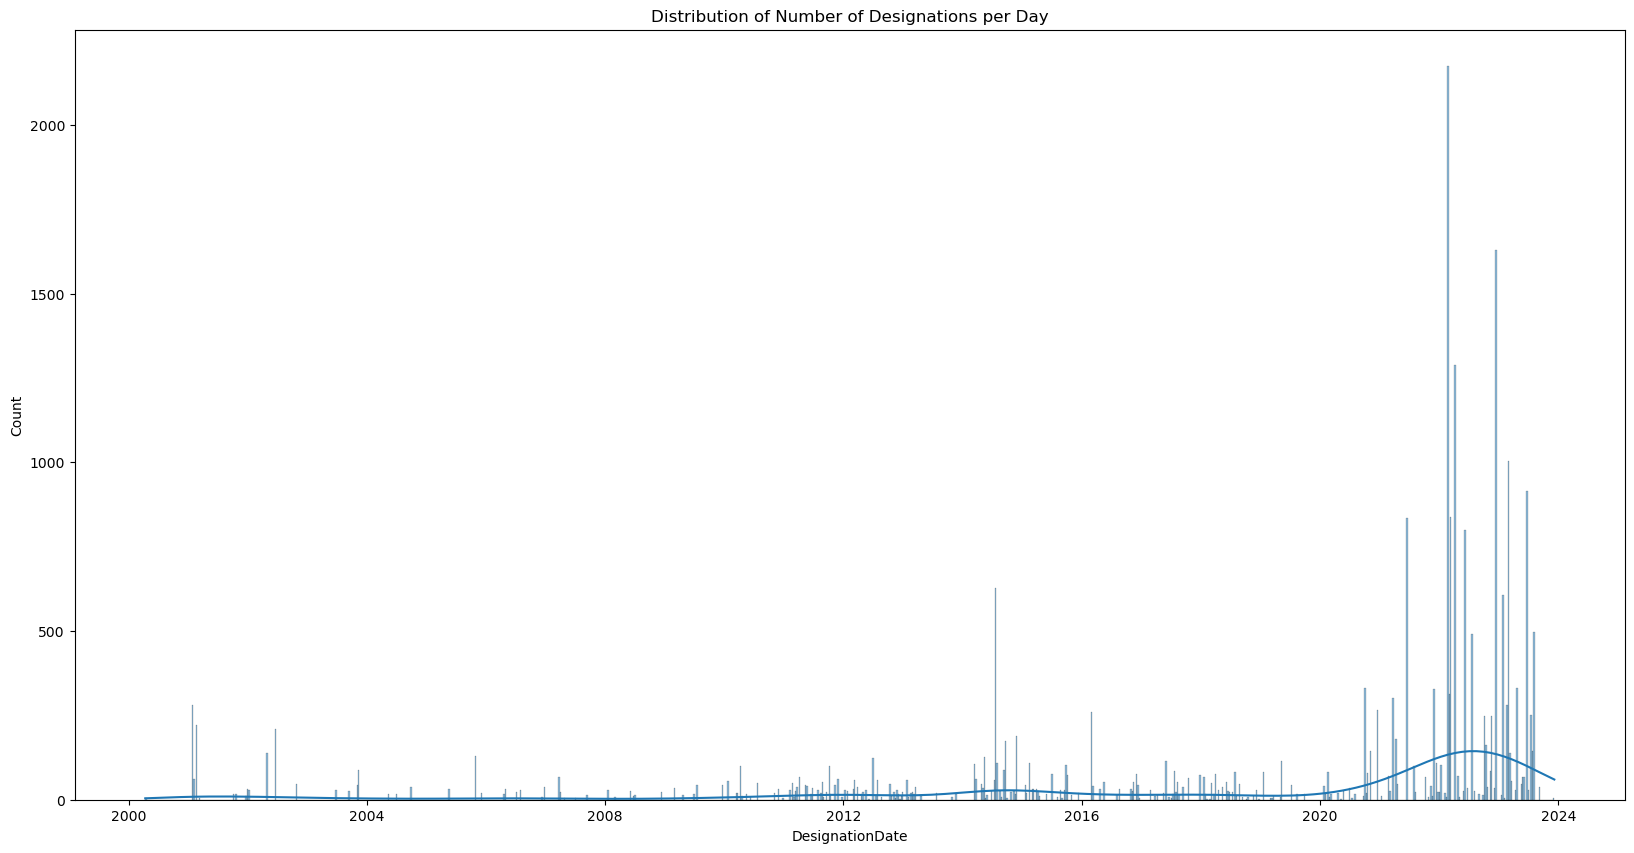

In [27]:
plt.figure(figsize=(20,10))
sns.histplot(df.DesignationDate, kde=True,bins=1000)
plt.title("Distribution of Number of Designations per Day")
plt.savefig('EU/DesignationDay.png')
plt.show()

obviously February is visible as in Feb 2022. Apart from that, the variable doesnot give us much information - need to be grouped by year


<function matplotlib.pyplot.show(close=None, block=None)>

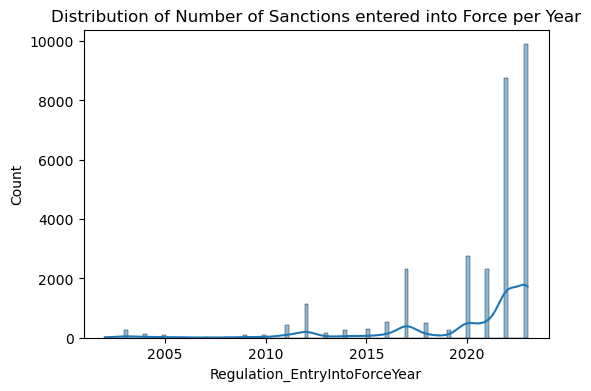

In [28]:
plt.figure(figsize=(6,4))
plot3 = sns.histplot(df.Regulation_EntryIntoForceYear,kde=True)
plt.title("Distribution of Number of Sanctions entered into Force per Year")
plt.savefig('EU/EntryIntoForceYear.png')
plt.show

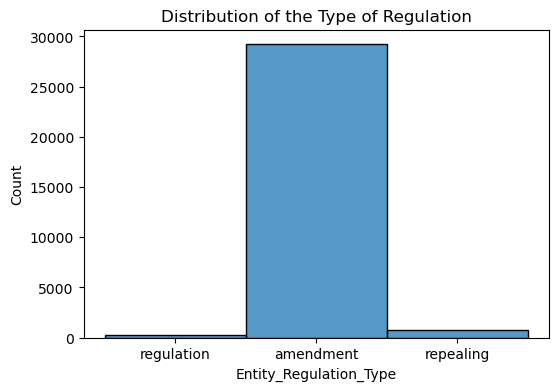

In [29]:
plt.figure(figsize=(6,4))
plot4=sns.histplot(df.Entity_Regulation_Type)
plt.title("Distribution of the Type of Regulation")
plt.show()

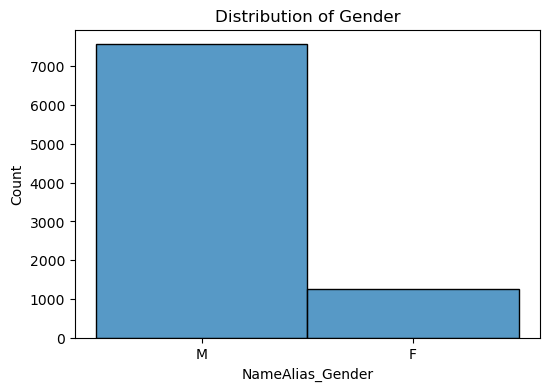

In [30]:
plt.figure(figsize=(6,4))
plot5=sns.histplot(df.NameAlias_Gender)
plt.title("Distribution of Gender")
plt.show()

**Create final dataset**

In [31]:
#filter to only retrieve variables needed -- need input from christian

#change dtypes

#rename columns to usable names

#check duplicates & spelling
#we need to remove duplicates and aliases and match enterprises to people?
#obv we then also need to pivot

In [32]:
#get outputs like designations per programme
#produce a column that gives us the n of designations
#df["Designation_Number"] = df.Entity_DesignationDate.unique()
#df["Designation_Number"]

In [33]:
#time trend of the data
grouped = df.groupby(['Entity_Regulation_Programme', 'DesignationYear']).agg({'': 'sum'})

pivoted = grouped.pivot(index='DesignationYear", columns='Entity_Regulation_Programme', values='')
pivoted.plot.area(stacked=False)

plt.xlabel('Year of Designation')
plt.ylabel('Sanctions Programme/ Regime')
plt.savefig('timetrend_designation_regime.png')
# Show the plot
plt.show()

SyntaxError: unterminated string literal (detected at line 4) (3960923496.py, line 4)